In [2]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import nibabel as nib

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow import keras
from keras.models import load_model
from keras import backend as K

In [3]:
batch_size = 64
# Creating a generator for the training set
# Rescaling images
train_datagen = ImageDataGenerator(rescale=1/255)
# Flowing images from my local directory
train_generator = train_datagen.flow_from_directory(
        '/home/kenan/Desktop/COV19D/train/',  # Source directory for training images
        target_size=(512, 512),  # Images are 512x512
        batch_size=batch_size,  # The batch size
        classes = ['covid','non-covid'], # Two classes
        class_mode='binary') # Binary Task

Found 335672 images belonging to 2 classes.


In [4]:
# Creating a similar generator for the validation set
val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
        '/home/kenan/Desktop/COV19D/validation/',  
        target_size=(512, 512),  
        batch_size=batch_size,
        classes = ['covid','non-covid'],
        class_mode='binary')

Found 75532 images belonging to 2 classes.


In [5]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [6]:
val_generator.classes 

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [7]:
# Building a CNN model 
model = tf.keras.models.Sequential([
    # The first convolution 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(512, 512, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.2),
    # flatten layer
    tf.keras.layers.Flatten(),
    # Dense layer
    tf.keras.layers.Dense(128, activation='relu'),
    # Binary outputs for the task
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0

In [18]:
total_sample=train_generator.n
n_epochs = 20
steps_per_epoch_train = len(train_generator) // batch_size
steps_per_epoch_val = len(val_generator) // batch_size

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Training the model
history=model.fit_generator(generator=train_generator, 
                            steps_per_epoch=steps_per_epoch_train, 
                            validation_data=val_generator, 
                            validation_steps=steps_per_epoch_val, 
                            epochs=n_epochs)

Epoch 1/20
81/81 [==============================] - 416s 5s/step - loss: 0.2496 - accuracy: 0.8953 - val_loss: 0.6449 - val_accuracy: 0.7882
Epoch 2/20
81/81 [==============================] - 429s 5s/step - loss: 0.2623 - accuracy: 0.8917 - val_loss: 0.6419 - val_accuracy: 0.7717
Epoch 3/20
81/81 [==============================] - 427s 5s/step - loss: 0.2231 - accuracy: 0.9042 - val_loss: 0.6363 - val_accuracy: 0.7630
Epoch 4/20
81/81 [==============================] - 416s 5s/step - loss: 0.1952 - accuracy: 0.9193 - val_loss: 0.7128 - val_accuracy: 0.7752
Epoch 5/20
81/81 [==============================] - 425s 5s/step - loss: 0.1830 - accuracy: 0.9290 - val_loss: 0.6909 - val_accuracy: 0.7769
Epoch 6/20
81/81 [==============================] - 424s 5s/step - loss: 0.1934 - accuracy: 0.9222 - val_loss: 0.6606 - val_accuracy: 0.7752
Epoch 7/20
81/81 [==============================] - 443s 5s/step - loss: 0.1619 - accuracy: 0.9383 - val_loss: 0.6182 - val_accuracy: 0.7812
Epoch 8/20
81

In [21]:
# Saving the model locally as an 'h5' formated file
model_1_acc = model.save('/home/kenan/Desktop/COV19D/ckpts1/model_acc_1.h5')

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

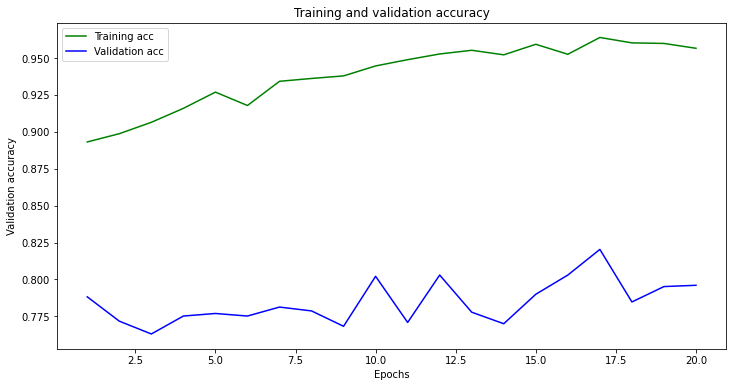

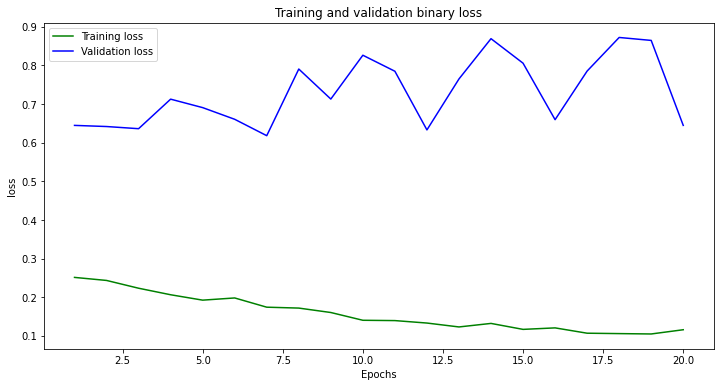

In [25]:
epochs = range(1, len(acc)+1)

plt.figure(figsize=(12,6))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.figure(figsize=(12,6))
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation binary loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()